# Описание

Данная тетрадка содержит в себе первое задание по компьютерному практикуму по экономике. Вам предстоит освоить ряд важных библиотек для Python, изучить основы Latex, а также создать экономические модели.

Все задания связаны с моделями бюджетных ограничений и предпочтений. 
* В первой модели существуют только два товара определенной цены. 
* Во второй модели определены 3 параметра: название, цена и количество товара, которое потребитель может получить бесплатно. За товар сверх этого количества необходимо заплатить указанную цену.
* В третьей модели для каждого товара есть порог количества. Товар в количестве ниже данного порога стоит одну цену, а каждая единица товара выше этого порога стоит другую цену.

Ожидается, что Вы разберетесь в представленных примерах и по их образцу сделаете более сложные задания. Также стремитесь к тому, чтобы Ваш код и Ваши пояснения были понятными. При необходимости комментируйте код и оставляйте заметки в текстовых полях.

## Баллы

За каждое задание начисляется определенное количество баллов. Если задание решено не полностью, то за него может быть начислена только часть баллов.

|№ Задания|Балл|
|---|---|
|[Задание 1](#task_1)|0.5|
|[Задание 2](#task_2)|0.5|
|[Задание 3](#task_3)|0.5|
|[Задание 4](#task_4)|0.5|
|[Задание 5](#task_5)|1|
|[Задание 6](#task_6)|0.5|
|[Задание 7](#task_7)|1|
|[Задание 8](#task_8)|1|
|[Задание 9](#task_9)|0.5|
|[Задание 10](#task_10)|0.5|
|[Задание 11](#task_11)|1|
|[Задание 12](#task_12)|1|
|[Задание 13](#task_13)|1.5|
|Всего|10|

<font color="red">Внимание! Для работы интерактивных виджетов необходимо активировать класс соответствующей модели(можно выполнить код до требуемой ячейки)</font> <a id="task_1"></a>

## Импорт библиотек

In [541]:
#Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y):
    return abs(x-y) < 1e-6

# Модель 1

## Описание класса

В данной модели у каждого товара есть только два параметра: название и цена за единицу.

In [542]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, price):
        self.name = name
        self.price = price

## Проверка бюджетного ограничения

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [543]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
    Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = x1*g1.price + x2*g2.price
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100    
print(budget_test(g1, g2, budget, 1, 1))
print(budget_test(g1, g2, budget, 10, 10))
print(budget_test(g1, g2, budget, 100, 100))

1
0
-1


## Графическое представление

Напишем функцию, которая будет визуализировать бюджетное множество и проверяемую точку.

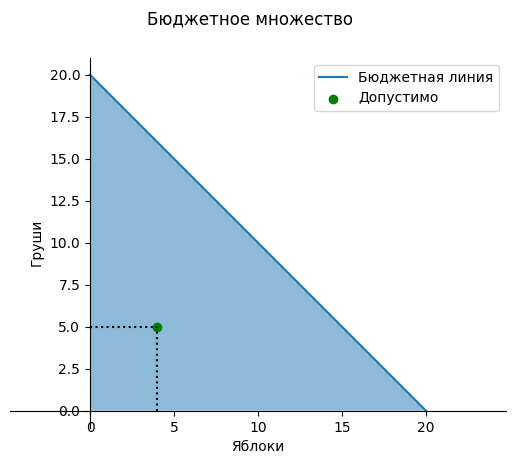

In [544]:

def plot_budget(g1, g2, budget, x1=0, x2=0):
    '''
    Построение графика бюджетного множества и расположения проверяемой точки
    '''
    
    # График будет построен по двум точкам (0, budget/g2.price) и (budget/g1.price, 0)
    x_points = [0, budget/g1.price] 
    y_points = [budget/g2.price, 0]
    

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100   
plot_budget(g1, g2, budget, 4, 5);

## Интерактивное представление

In [545]:
# Интерактивный виджет
def interactive_plot(p1, p2, budget, x1, x2):
    g1 = Good("Яблоки", p1) # Создаем первый товар с ценой p1
    g2 = Good("Груши", p2) # Создаем второй товар с ценой p2
    plot_budget(g1, g2, budget, x1, x2);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), x1 = (1,10), x2=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

## Работа с таблицами

В данном разделе мы будем работать с таблицами. Вначале мы загрузим данные из Excel файла в датафрейм библиотеки pandas. Затем мы обработаем строки этой таблицы, и для каждой строки проверим, выполняется ли бюджетное ограничение, и результаты сохраним в новый датафрейм. Далее мы отфильтруем получившийся датафрейм по условию, что бюджетное ограничение выполняется (в том числе на границе). Результат мы отсортируем по размеру бюджета и сохраним в новый Excel файл.

Файл model1_data.xlsx должен находиться в том же каталоге, что и данная тетрадка. Файл можно скачать по [данной ссылке](http://samonenko.ru/upload/model1_data.xlsx).

In [546]:
df = pd.read_excel("model1_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм 
df # Печатаем датафрейм

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant
0,Яблоки,5,Груши,5,50,5,5
1,Яблоки,5,Груши,5,51,5,5
2,Апельсины,5,Мандарины,5,49,5,5
3,Виоград,2,Малина,3,30,23,45
4,Виоград,2,Малина,3,30,6,8
5,Виоград,2,Малина,3,45,6,8


In [547]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов
    
    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price']) 
    g2 = Good(row['G2_name'], row['G2_price'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
2,Апельсины,5,Мандарины,5,49,5,5,-1
3,Виоград,2,Малина,3,30,23,45,-1
4,Виоград,2,Малина,3,30,6,8,-1
5,Виоград,2,Малина,3,45,6,8,1


In [548]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
5,Виоград,2,Малина,3,45,6,8,1


In [549]:
df_super = df_super.sort_values(by = 'Budget') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
5,Виоград,2,Малина,3,45,6,8,1
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1


In [550]:
df_super.to_excel("model1_result.xlsx") # Сохраняем 

## Обратная задача

### Случай двух товаров

Решим обратную задачу, теперь мы должны узнать стоимости товаров, если известны точки, которые лежат на границе кривой бюджетных ограничений.

Пусть нам известно, что две точки $A_1 = (a_{1,1}, a_{1,2})$ и $A_2 = (a_{2,1}, a_{2,2})$ лежат на границе кривой бюджетных ограничений. В нашей модели бюджетное ограничение задается прямой вида:
$$p_1 x_1 + p_2 x_2 = b,$$ 
где $p_1$ -- цена единицы первого продукта, $p_2$ -- цена единицы второго продукта и $b$ -- общий бюджет. Без ограничения общности мы можем считать, что $b=1$, т.е. мы должны найти значения цены единиц продукта как долей от общего бюджета.

Таким образом, нам надо решить систему линейных уравнений:
$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} = 1\\
p_1 a_{2,1} + p_2 a_{2,2} = 1
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} \\
    a_{2,1} & a_{2,2}
\end{pmatrix}
\begin{pmatrix}
    p_1 \\
    p_2
\end{pmatrix}
= 
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2
\end{pmatrix}
=
\begin{pmatrix}
        a_{1,1} && a_{1,2} \\
        a_{2,1} && a_{2,2} 
\end{pmatrix}^{-1}
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

При этом надо учесть, что $p_1 > 0$ и $p_2 > 0$, в противном случае полученное решение не соответствует изучаемой модели.

In [551]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([2,1]) # матрица 2x1 из единиц 

    # np.linalg.inv() -- поиск обратной матрицы
    # A @ B -- матричное умножение 
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [1,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,2],
    [2,2]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [2,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,1],
    [2,2]
]
print(get_goods_parameters(list_of_points))


[[0.33333333]
 [0.33333333]]
None
None
None


### Графическое представление

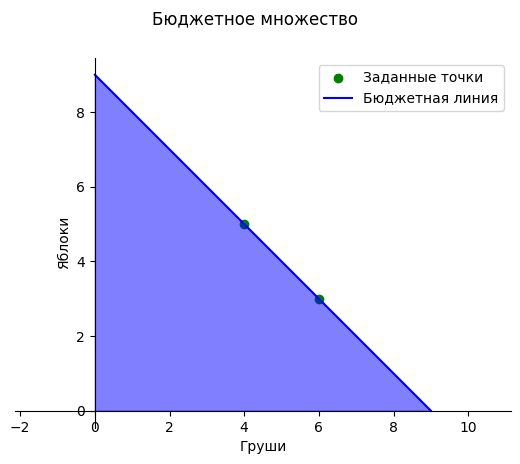

In [552]:
def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")
            
    ax.axis('equal') # Принудительно делаем оси равными

    result = get_goods_parameters(list_of_points)
    if not (result is None):
        fig.suptitle("Бюджетное множество")
        g1 = Good("Груши", result[0][0])
        g2 = Good("Яблоки", result[1][0])
        budget = 1
        x_points = [0, budget/g1.price] 
        y_points = [budget/g2.price, 0]
        
        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5
       
         # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()



list_of_points = [
    [4,5],
    [6,3]
]
plot_goods_parameters(list_of_points)

### Интерактивное представление

In [553]:
# Интерактивный виджет
def interactive_plot(x11, x12, x21, x22):
    list_of_points = [
        [x11, x12],
        [x21, x22]
    ]
    plot_goods_parameters(list_of_points);

interact(interactive_plot, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

### Случай трех товаров

Отметим, что рассуждения и код практически не поменяются, если речь пойдет о трех товарах и трех точках в трехмерном пространстве.

Пусть нам даны три точки $A_1 = (a_{1,1}, a_{1,2}, a_{1,3})$, $A_2 = (a_{2,1}, a_{2,2}, a_{2,3})$ и $A_3 = (a_{3,1}, a_{3,2}, a_{3,3})$. Надо решить систему линейных уравнений:

$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + p_3 a_{1,3}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + p_3 a_{2,3}= 1\\
p_1 a_{3,1} + p_2 a_{3,2} + p_3 a_{3,3}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
= 
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

In [554]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([3,1]) # единственное изменение тут

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [0,0,1],
    [0,1,0],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]]
None


### Случай $n$ товаров. <font color="red">Задание 1.</font> <a id="task_1"></a>

Реализуйте предыдущий пример для случая $n$ товаров. Вам надо написать поясняющий текст, используя $\LaTeX$, а также реализовать саму функцию.

Пусть нам даны $n$ точек $A_1 = (a_{1,1}, a_{1,2}, \dots ,a_{1,n})$, $A_2 = (a_{2,1}, a_{2,2}, \dots, a_{2,n})$, $\dots$, $A_n = (a_{n,1}, a_{n,2}, \dots, a_{n,n})$. Надо решить систему линейных уравнений: 

<!-- <font color="red">**Тут Ваш текст**</a> -->

$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + \dots + p_n a_{1,n}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + \dots + p_n a_{2,n}= 1\\
 \vdots\\
p_1 a_{n,1} + p_2 a_{n,2} + \dots + p_n a_{n,n}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
  \begin{array}{cccc}
      a_{1,1} & a_{1,2} & \ldots & a_{1,n}\\
      a_{2,1} & a_{2,2} & \ldots & a_{2,n}\\
      \vdots & & \ddots &  \vdots \\
      a_{n,1} & a_{n,2} & \ldots & a_{n,n}\\
  \end{array}
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        \vdots\\
        p_n
\end{pmatrix}
= 
\begin{pmatrix}
        1 \\
        1 \\
        \vdots\\
        1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        \vdots\\
        p_n
\end{pmatrix}
=
\begin{pmatrix}
  \begin{array}{cccc}
      a_{1,1} & a_{1,2} & \ldots & a_{1,n}\\
      a_{2,1} & a_{2,2} & \ldots & a_{2,n}\\
      \vdots & & \ddots & \vdots \\
      a_{n,1} & a_{n,2} & \ldots & a_{n,n}\\
  \end{array}
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        \vdots \\
        1
\end{pmatrix}
$$

In [555]:
def get_goods_parameters(list_of_points: np.array):
    ones = np.ones([len(list_of_points),1]) #столбец 1 длины n

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = np.eye(10) # Единичная матрица
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
None


## Кривые безразличия

### Параметры функции полезности Кобба-Дугласа

Напишем функцию, которая будет строить графики кривых безразличия функции полезности Кобба-Дугласа вида
$$c = x^{\alpha}y^{1-\alpha}$$
при различных значениях параметров $c$ и $\alpha$.

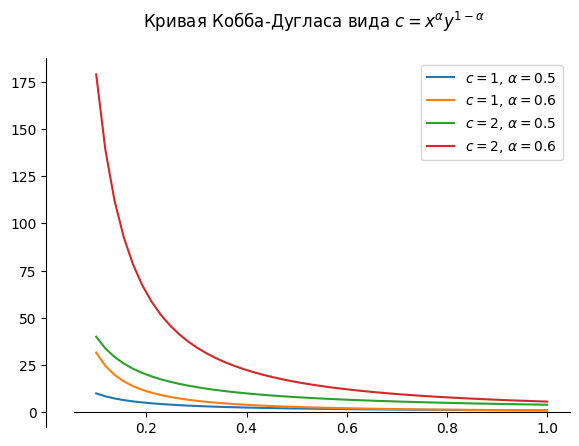

In [556]:
def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def plot_Cobb_Douglas(c_values, alpha_values):
    x_values = np.linspace(0.1, 1) # Массив из 50 точек от 0.1 до 1

    fig, ax = plt.subplots()
    fig.suptitle("Кривая Кобба-Дугласа вида $c = x^{\\alpha}y^{1-\\alpha}$") # Двойные слеши нужны, чтобы не экранировать следующий символ
    
    for c in c_values:
        for alpha in alpha_values:
            y_values = [Cobb_Douglas(x, c, alpha) for x in x_values]    
            ax.plot(x_values, y_values, label=f"$с = {c}$, $\\alpha = {alpha} $")
    

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend()
    

c_values = [1, 2]
alpha_values = [0.5, 0.6]
plot_Cobb_Douglas(c_values, alpha_values)

### Поиск и визуализация оптимального решения для функции Кобба-Дугласса

Напишем функцию, которая по информации о двух товарах, бюджете и параметре $\alpha$ функции полезности Кобба-Дугласа найдет оптимальное решение, т.е. точку касания кривой безразличия функции Кобба-Дугласа и границы бюджетного ограничения.

Известно, что решение можно найти по формуле:
$$
\begin{cases}
x_1 = \frac{\alpha}{g1.price}\\
x_2 = \frac{1-\alpha}{g2.price}\\
\end{cases}
$$

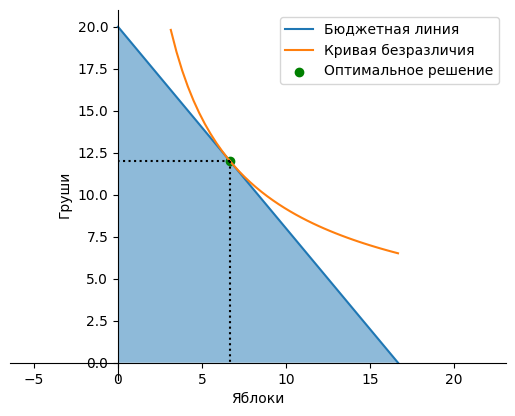

In [557]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    x_solution = alpha*budget/g1.price
    y_solution = (1-alpha)*budget/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    x_values = np.linspace(0.1, budget/g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

### Интерактивная визуализация оптимального решения для функции Кобба-Дугласа

In [558]:
def interactive_plot(p1, p2, budget, alpha):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

### Параметры функции полезности Леонтьева. <font color="red">Задание 2</font> <a id="task_2"></a>

Напишите код, который визуализирует графики кривых безразличия для функции Леонтьева вида 
$$
с = \min(\frac{x}{a}, \frac{y}{b})
$$
при различных значениях параметров $а$ и $b$.

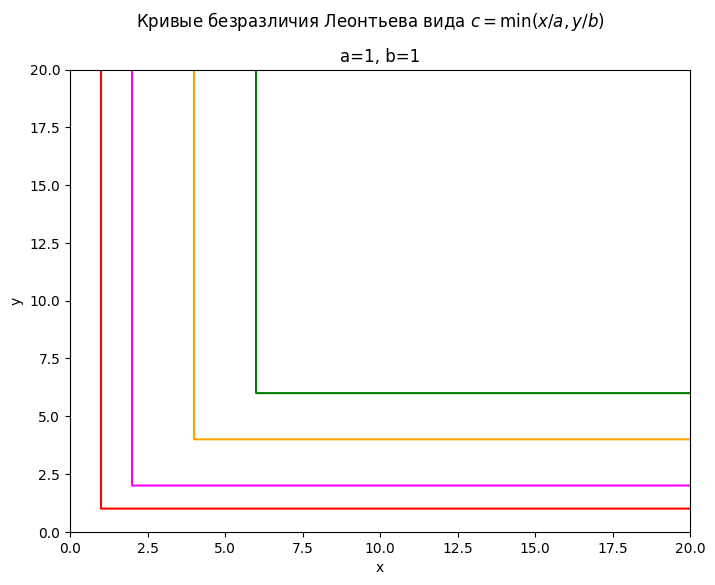

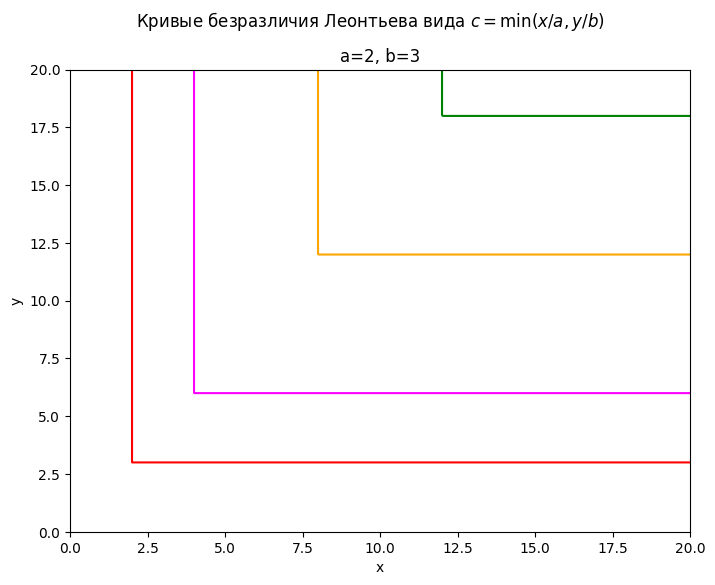

In [559]:
def plot_Leontev(a_values, b_values):
    # задаём размеры рассматриваемого пространства
    x = np.linspace(0, 20, 500)
    y = np.linspace(0, 20, 500)
    # создаём матрицы с координатами сетки
    X, Y = np.meshgrid(x, y)
    # находим резульат С для каждого из данных значений по всей сетке
    for a, b in zip(a_values, b_values):
        C = np.minimum(X / a, Y / b)
        # строим график
        fig, ax = plt.subplots(figsize=(8, 6))
        # указываем интересующие нас уровни и цвета для контрастности
        ax.contour(X, Y, C, levels=[1, 2, 4, 6], colors=['red', 'magenta', 'orange', 'green'])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(f'a={a}, b={b}')
        fig.suptitle("Кривые безразличия Леонтьева вида $с = \min(x/a, y/b)$")

        plt.show()

a_values = [1, 2]
b_values = [1, 3]
plot_Leontev(a_values, b_values)

### Поиск и визуализация оптимального решения для функции полезности Леонтьева. <font color="red">Задание 3</font> <a id="task_3"></a>

Для двух заданных товаров $g1$, $g2$, величины бюджета $budget$, а также параметров $a$ и $b$ функции полезности Леонтьева, найдите оптимальное решение и визуализируйте его.

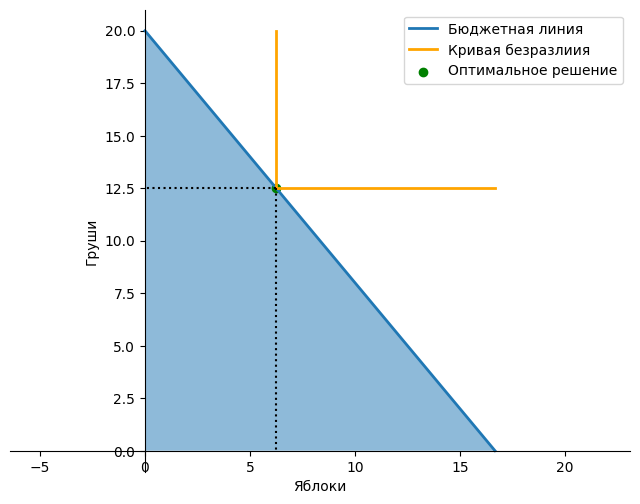

In [560]:
# функция нажождения оптимума, лежащего на БЛ, путём пересечения 2 прямых - БЛ и прямой, индуцирующей семейство изломов КБ
def find_intersection(tg, budget, g1_price, g2_price):
    x = np.linalg.solve([[tg, -1], [-g1_price / g2_price, -1]], [0, -budget / g2_price])[0]
    y = tg * x
    return x, y

def plot_budget_Leontev(g1, g2, budget, a=1, b=1):
    # угловые точки для построенияя БЛ
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]

    fig, ax = plt.subplots(figsize=(8, 6))
    # строим БЛ
    ax.plot(x_points, y_points, label="Бюджетная линия", linewidth = 2)
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # добавляем полупрозрачную заливку
    tg_leontev = b / a # тангенс БЛ

    x, y = find_intersection(tg_leontev, budget, g1.price, g2.price)
    # построение графика
    ax.plot([x, budget/g1.price], [y, y], 'orange', linewidth = 2, label="Кривая безразлиия")
    ax.plot([x, x], [y, budget/g2.price], 'orange', linewidth = 2)

    ax.plot([x, 0], [y, y], 'k:')
    ax.plot([x, x], [y, 0], 'k:')

    plt.scatter(x, y, label="Оптимальное решение", color='green')

    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend(loc='upper right')
    plt.show()

g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
a = 1
b = 2
plot_budget_Leontev(g1, g2, budget, a, b)

### Интерактивная визуализация оптимального решения для функции полезности Леонтьева

In [561]:
def interactive_plot(p1, p2, budget, a, b):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Leontev(g1, g2, budget, a, b);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), a=(1,10), b=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 2

## Описание класса

В данной модели у каждого товара есть три параметра: название, цена и количество такого товара, которое можно получить бесплатно.
Это означает, что потребитель всегда может получить бесплатно товар в заданном количестве, а за каждую следующую единицу товара необходимо заплатить указанную цену.

In [562]:
class Good():
    def __init__(self, name, price, free):
        self.name = name
        self.price = price
        self.free = free # Количество продукта, которое можно получить бесплатно

## Проверка бюджетного ограничения. <font color="red">Задание 4</font><a id="task_4"></a>

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [563]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    # находим денежный эквивалент за товар, который необходимо купить, полагая,
    # что избыток бесплатного товара нельзя продать (== не можем иметь отрицательный эквивалент)
    if x1-g1.free < 0:
       money_equivalent = (x2-g2.free) * g2.price
    elif x2-g2.free < 0:
      money_equivalent = (x1-g1.free) * g1.price
    elif x1-g1.free < 0 and x2-g2.free < 0:
      money_equivalent = 0
    else:
      money_equivalent = (x1-g1.free) * g1.price + (x2-g2.free) * g2.price

    # проверяем что бюджет позволяяет купить данный набор
    if budget > money_equivalent:
      return 1
    elif budget == money_equivalent:
      return 0
    else:
      return -1

g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое представление. <font color="red">Задание 5.</font> <a id="task_5"></a>

Напишите функцию, которая будет изображать бюджетное множество и проверяемую точку.

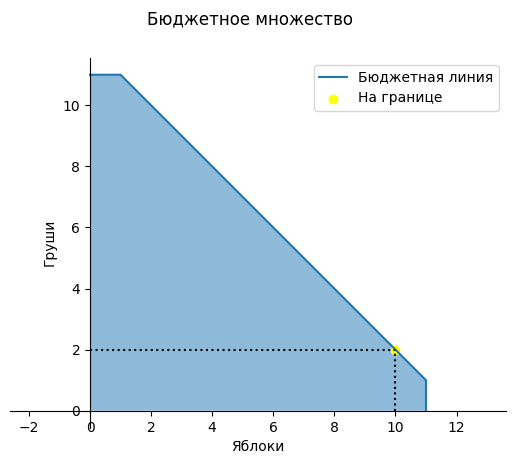

In [564]:
def plot_budget(g1: Good, g2: Good, budget, x, y):

    # точки излома БЛ, с учётом бесплатного товара
    x_points = [0, g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free]
    y_points = [budget/g2.price + g2.free, budget/g2.price + g2.free, g2.free, 0]

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим БЛ
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test(g1, g2, budget, x, y) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x, y, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x, x], [0, y], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x], [y, y], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend(loc='upper right') # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок

g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
plot_budget(g1, g2, budget, 10, 2)

## Интерактивное представление

In [565]:
def interactive_plot(p1, f1, p2, f2, budget, x, y):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget(g1, g2, budget, x, y);

interact(interactive_plot, p1=(1, 10), f1=(0, 10), p2 = (1, 10), f2=(0,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='f1'…

<function __main__.interactive_plot(p1, f1, p2, f2, budget, x, y)>

## Работа с таблицами. <font color="red">Задание 6</font><a id="task_7"></a>

Выполните аналогичные действия, как и с моделью 1, а именно:
* Создайте файл model2_data.xlsx по аналогии с тем, как устроен файл model1_data.xlsx. И добавьте в него как минимум 10 строчек.
* Загрузите данные из таблицы model2_data.xlsx
* Для каждой записи проверьте, выполнено ли бюджетное ограничение.
* Отфильтруйте только те варианты, в которых бюджетное ограничение выполняется (в том числе и на границе).
* Отсортируйте таблицу по столбцу G1_free.
* Результат сохраните в файл model2_result.xlsx

Допускается в этом задании вместо Excel файлов использовать csv файлы.

In [566]:
#считываем данные
try:
    data = pd.read_excel("model2_data.xlsx")
    data
except:
    print("Файл не найден")

In [567]:
try:
    result = []
    for index, row in data.iterrows():# проходимся по столбцам
        # инициализируем данные для товаров
        g1 = Good(row["G1_name"], row["G1_free"], row["G1_price"])
        g2 = Good(row["G2_name"], row["G2_free"], row["G2_price"])
        # выполняем проверку
        result.append(budget_test(g1,g2, row["Budget"], row["G1_quant"], row["G2_quant"]))

    data["Result"] = result # создали новый столбец с результатом проверки

    data_res = data[data["Result"] >= 0] # проверяем на принадлежность бюджетному множеству
    data_res = data_res.sort_values(by = "G1_free") # сортируем итоговые данные по G1_free

    data_res.to_excel("model2_result.xlsx") # сохраняем полученный результат
    data_res
except:
    print("Файл не найден")

## Обратная задача. <font color="red">Задание 7</font> <a id="task_7"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 2, т.е. значения __price >0__ и __free >= 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи, по аналогии с тем, как это сделано для Модели 1.

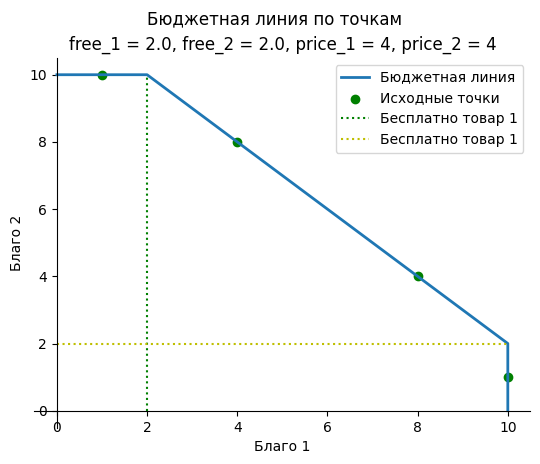

In [568]:
# фукнция принимает два массива: координаты точек по x и y
def find_goods(x_points, y_points):
    """
    Функция находит цены и начальный запас товаров, при которых бюджетная линия проходит через заданные точки.
    """
    try:
        # находим крайние точки
        max_x = max(x_points)
        max_y = max(y_points)
        min_x = min(x_points)
        min_y = min(y_points)

        # проверяем, что точки позволяют найти решение
        if x_points.count(min_x) > 1 or y_points.count(min_y) > 1:
            print("Для данного набора точек невозможно подобрать параметры")
            return

        if x_points.count(min_x) == 1 and y_points.count(min_y) == 1 and x_points.count(max_x) == 1 and y_points.count(
                max_y) == 1:
            if x_points.index(max_x) != y_points.index(min_y) or x_points.index(min_x) != y_points.index(max_y):
                print("Для данного набора точек невозможно подобрать параметры")
                return

        mid_x = []
        mid_y = []

        # отбираем оставшиеся 2 точки, через которые пройдёт наклонная линия
        for x, y in zip(x_points, y_points):
            if x != max_x and x != min_x or y != max_y and y != min_y:
                mid_x.append(x)
                mid_y.append(y)
        # случай если пары точек лежат на 1 прямой, но имеют решение
        if len(mid_y) < 2:
            mid_x.append(max_x)
            mid_x.extend([i for i in x_points if i != min_x and i != max_x])
            mid_y.append(max_y)
            mid_y.extend([i for i in y_points if i != min_y and i != max_y])

        tg_diag = abs(mid_y[0] - mid_y[1]) / abs(mid_x[0] - mid_x[1])

        # разности крайних верхних и нижних точек с ближайшими центральными
        dlta_x_lo = max_x - max(mid_x)
        dlta_y_up = max_y - max(mid_y)
        dlta_y_lo = min(mid_y) - min_y
        dlta_x_up = min(mid_x) - min_x

        # проверяем, что крайние точки, лежат не за пределами наклонной линии, проведённой ерез средние точки
        if min(mid_y) - dlta_x_lo * tg_diag <= min_y or min(mid_x) - dlta_y_up / tg_diag <= min_x:
            print("Для данного набора точек невозможно подобрать параметры")
            return
        # клюевые точки излома для БЛ
        x_zig = [0, min(mid_x) - dlta_y_up / tg_diag, max_x, max_x]
        y_zig = [max_y, max_y, min(mid_y) - dlta_x_lo * tg_diag, 0]

        fig, ax = plt.subplots()  # Создаем фигуру
        fig.suptitle("Бюджетная линия по точкам")

        ax.plot(x_zig, y_zig, label="Бюджетная линия", linewidth=2)  # Строим БЛ

        ax.scatter(x_points, y_points, color="green", label="Исходные точки")

        # отобразим на грифике получившиеся параметры
        ax.set_title(
            f"free_1 = {min(mid_x) - dlta_y_up / tg_diag}, free_2 = {min(mid_y) - dlta_x_lo * tg_diag}, price_1 = {abs(mid_y[0] - mid_y[1])}, price_2 = {abs(mid_x[0] - mid_x[1])}")

        ax.plot([min(mid_x) - dlta_y_up / tg_diag, min(mid_x) - dlta_y_up / tg_diag], [0, max_y], 'g:',
                label=f"Бесплатно товар 1")  # Добавляем вертикальную зелёную (g) пунктирную (:) линию
        ax.plot([0, max_x], [min(mid_y) - dlta_x_lo * tg_diag, min(mid_y) - dlta_x_lo * tg_diag], 'y:',
                label=f"Бесплатно товар 1")  # Добавляем горизонтальную жёлтую (y) пунктирную (:) линию

        ax.set_xlabel("Благо 1")
        ax.set_ylabel("Благо 2")

        # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        plt.legend(loc="upper right")
        plt.show()  # Отображаем график
    except:
        print("Что-то пошло не так, введите другие параметры")
        return


x_point = [1, 4, 8, 10]
y_point = [10, 8, 4, 1]
find_goods(x_point, y_point)


In [569]:
# Интерактивный виджет
def interactive_plot(x1, y1, x2, y2, x3, y3, x4, y4):
    x_pnts = [x1, x2, x3, x4]
    y_pnts = [y1, y2, y3, y4]
    find_goods(x_pnts, y_pnts);
# зададим ползунки с начлальными параметрами, удоволетворияющие условиям построения, что бы не поломать всё)
interact(interactive_plot, x1=widgets.IntSlider(min=1, max=10, step=1, value=2),
         y1=widgets.IntSlider(min=1, max=10, step=1, value=8), x2=widgets.IntSlider(min=1, max=10, step=1, value=3),
         y2=widgets.IntSlider(min=1, max=10, step=1, value=8),
         x3=widgets.IntSlider(min=1, max=10, step=1, value=5), y3=widgets.IntSlider(min=1, max=10, step=1, value=4),
         x4=widgets.IntSlider(min=1, max=10, step=1, value=6), y4=widgets.IntSlider(min=1, max=10, step=1, value=1));


interactive(children=(IntSlider(value=2, description='x1', max=10, min=1), IntSlider(value=8, description='y1'…

## Кривые безразличия. <font color="red">Задание 8</font> <a id="task_8"></a>

Для двух товаров из Модели 2 и кривой безразличия функции Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Пример работы расположен по [данной ссылке](https://samonenko-econom-practice-example-streamlit-app-yyqr46.streamlit.app/)

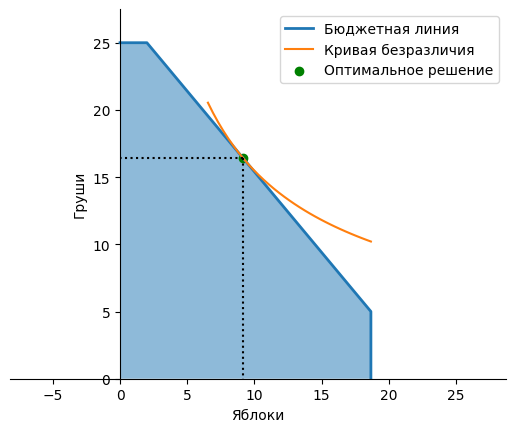

In [570]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    # трапецию превратим в треугольник
    x_solution = alpha * (g1.free + (budget / g2.price + g2.free) / (g1.price/g2.price))
    y_solution = (1 - alpha) * (g2.free + (budget / g1.price + g1.free) / (g2.price /g1.price))

    # проверим, что ответ принадлежит наклонной линии исходной трапеции
    if x_solution < g1.free:
        x_solution = g1.free
        y_solution = budget / g2.price + g2.free
    elif y_solution < g2.free:
        y_solution = g2.free
        x_solution = budget / g1.price + g1.free

    return x_solution, y_solution, math.pow(x_solution, alpha) * math.pow(y_solution, 1 - alpha)


def plot_budget_Cobb_Douglas(g1: Good, g2: Good, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)

    x_points = [0, g1.free, budget / g1.price + g1.free, budget / g1.price + g1.free]
    y_points = [budget / g2.price + g2.free, budget / g2.price + g2.free, g2.free, 0]

    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия", linewidth=2)
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)

    x_values = np.linspace(0.1, budget / g1.price + g1.free)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < (g2.free + (budget / g1.price + g1.free) * (g2.price / g1.price))
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    # ограничим график, чтобы не отображать ненужную информацию о КБ
    ax.set_xlim([0, (budget / g1.price + g1.free) * 1.1])
    ax.set_ylim([0, (budget / g2.price + g2.free) * 1.1])
    ax.legend(loc='upper right')
    plt.show()

g1 = Good("Яблоки", 6, 2)
g2 = Good("Груши", 5, 5)
budget = 100
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

In [571]:
def interactive_plot(p1, p2, f1, f2, budget, alpha):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), f1 = (0,10), f2=(0,10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 3

## Описание класса. <font color="red">Задание 9</font> <a id="task_9"></a>

В данной модели у каждого товара есть следующие параметры: определено некоторое пороговое значение threshold, а также две цены - $price_1$ и $price_2$. Если количество купленного товара меньше и равна $threshold$, то каждая его единица стоит $price_1$. А каждая единица товара свыше $threshold$ стоит $price_2$.

Например, если $threshold = 3$, $price_1 = 10$ и $price_2 = 5$, то:
* 2 единицы товара стоят 20,
* 3 единицы товара стоят 30,
* 4 единицы товара стоят 35,
* 5 единиц товара стоят 40.

Создайте класс Good для товаров данной модели. Реализуйте в классе метод price(quantity), который будет находить стоимость x товаров данного вида. Реализуйте в классе метод quantity(budget), который будет находить какое количество данного товара можно приобрести за стоимость budget.

In [572]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, threshold, price_1, price_2):
        self.name = name
        self.threshold = threshold
        self.price_1 = price_1
        self.price_2 = price_2
    
    def price(self, quantity):
        if quantity <= self.threshold:
            return quantity * self.price_1
        else:
            return self.threshold * self.price_1 + (quantity - self.threshold) * self.price_2
    
    def quantity(self, budget):
        if budget <= self.threshold * self.price_1:
            return np.floor(budget / self.price_1)# округляем вниз, так как не можем купить дробное число товара
        else:
            return np.floor(self.threshold + (budget - self.threshold * self.price_1) / self.price_2)

g1 = Good("Apples", 10, 2, 3)
print(g1.price(5))
print(g1.price(15))
print(g1.quantity(30))
print(g1.quantity(51))

10
35
13.0
20.0


## Бюджетное ограничение. <font color="red">Задание 10</font> <a id="task_10"></a>

Напишем функцию, которая проверит удовлетворяет ли конкретная точка бюджетным ограничениям.

In [573]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    money_equivalent = g1.price(x1) + g2.price(x2)

    if budget > money_equivalent:
      return 1
    elif budget == money_equivalent:
      return 0
    else:
      return -1

g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое и интерактивное представление. <font color="red">Задание 11.</font> <a id="task_11"></a>

Напишите функцию, которая будет визуализировать бюджетное множество и проверяемую точку, а также по аналогии с предыдущими примерами реализуйте интерактивное представление.

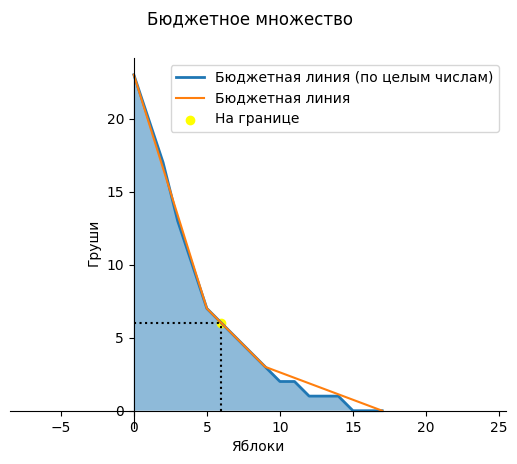

In [574]:
def plot_budget(g1: Good, g2: Good, budget, x, y):
    #точки излома БЛ, с учётом изменения цен
    if g1.quantity(budget - g2.price_1 * g2.threshold) > g1.threshold:
        x_points = [0, g1.threshold, g1.quantity(budget - g2.price_1 * g2.threshold), g1.quantity(budget)]
        y_points = [g2.quantity(budget), g2.quantity(budget - g1.price_1 * g1.threshold),g2.threshold , 0]
    else:
        x_points = [0, g1.quantity(budget - g2.price_1 * g2.threshold), g1.threshold, g1.quantity(budget)]
        y_points = [g2.quantity(budget), g2.threshold, g2.quantity(budget - g1.price_1 * g1.threshold), 0]

    X = range(0, int(g1.quantity(budget))+1)
    Y = [g2.quantity(budget - g1.price(i))for i in X] # значения модели при целочисленном измерении
    fig, ax = plt.subplots() # Создаем фигуру
    ax.plot(X, Y, label="Бюджетная линия (по целым числам)", linewidth = 2) 
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим БЛ
    ax.fill_between(X, Y, np.zeros_like(X), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test(g1, g2, budget, x, y) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x, y, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x, x], [0, y], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x], [y, y], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend(loc='upper right') # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок

g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
plot_budget(g1, g2, budget, 6, 6)

In [575]:
def interactive_plot(threshold_1, price_1_1, price_1_2, threshold_2, price_2_1, price_2_2, budget, x, y):
    g1 = Good("Благо 1", threshold_1, price_1_1, price_1_2)
    g2 = Good("Благо 2", threshold_2, price_2_1, price_2_2)
    plot_budget(g1, g2, budget, x, y)


interact(interactive_plot, threshold_1=widgets.IntSlider(min=1, max=20, step=1, value=3),
         price_1_1=widgets.IntSlider(min=1, max=20, step=1, value=6),
         price_1_2=widgets.IntSlider(min=1, max=20, step=1, value=3),
         threshold_2=widgets.IntSlider(min=1, max=20, step=1, value=4),
         price_2_1=widgets.IntSlider(min=1, max=20, step=1, value=6),
         price_2_2=widgets.IntSlider(min=1, max=20, step=1, value=2), budget=(1, 100),
         x=widgets.IntSlider(min=1, max=20, step=1, value=6), y=(1, 10))


interactive(children=(IntSlider(value=3, description='threshold_1', max=20, min=1), IntSlider(value=6, descrip…

<function __main__.interactive_plot(threshold_1, price_1_1, price_1_2, threshold_2, price_2_1, price_2_2, budget, x, y)>

## Обратная задача. <font color="red">Задание 12</font> <a id="task_12"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 3, т.е. значения __threshold > 0__, __price_1 > 0__ и __price_2 > 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи по аналогии с тем, как это сделано для Модели 1.

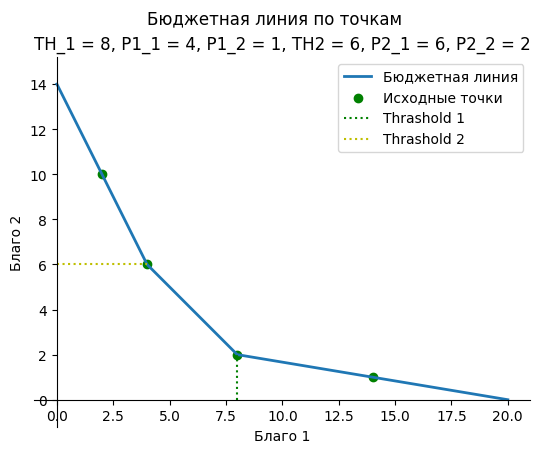

In [576]:
# фукнция принимает два массива: координаты точек по x и y
def find_goods(x_points, y_points):
    """
    Функция находит цены и начальный запас товаров, при которых бюджетная линия проходит через заданные точки.
    """
    try:
        for i in range(4):
            for j in range(i + 1, 4):
                if x_points[i] == x_points[j] and y_points[i] == y_points[j]:
                    print("Решений этой задачи - бесконечно много, вводите оличающиеся точки")
                    return
        # находим крайние точки
        max_x = max(x_points)
        max_y = max(y_points)
        min_x = min(x_points)
        min_y = min(y_points)

        # проверяем, что точки позволяют найти решение
        if x_points.count(min_x) > 1 or y_points.count(min_y) > 1:
            print("Для данного набора точек невозможно подобрать параметры")
            return

        if x_points.count(min_x) == 1 and y_points.count(min_y) == 1 and x_points.count(max_x) == 1 and y_points.count(
                max_y) == 1:
            if x_points.index(max_x) != y_points.index(min_y) or x_points.index(min_x) != y_points.index(max_y):
                print("Для данного набора точек невозможно подобрать параметры")
                return

        mid_x = []
        mid_y = []

        # отбираем оставшиеся 2 точки, через которые пройдёт наклонная линия
        for x, y in zip(x_points, y_points):
            if x != max_x and x != min_x or y != max_y and y != min_y:
                mid_x.append(x)
                mid_y.append(y)
        # случай если пары точек лежат на 1 прямой, но имеют решение
        if len(mid_y) < 2:
            mid_x.append(max_x)
            mid_x.extend([i for i in x_points if i != min_x and i != max_x])
            mid_y.append(max_y)
            mid_y.extend([i for i in y_points if i != min_y and i != max_y])

        # проверка на нужный наклон центральной линии
        if mid_x.index(max(mid_x)) != mid_y.index(min(mid_y)):
            print("Для данного набора точек невозможно подобрать параметры")
            return
        tg_diag = abs(mid_y[0] - mid_y[1]) / abs(mid_x[0] - mid_x[1])

        # разности крайних верхних и нижних точек с ближайшими центральными
        dlta_x_lo = max_x - max(mid_x)
        dlta_y_up = max_y - max(mid_y)
        dlta_y_lo = min(mid_y) - min_y
        dlta_x_up = min(mid_x) - min_x
        if dlta_x_up != 0:
            tg_up = dlta_y_up / dlta_x_up
        else:
            tg_up = 0
        if dlta_x_lo != 0:
            tg_lo = dlta_y_lo / dlta_x_lo
        else:
            tg_lo = 0

        # ключевые точки излома для БЛ
        if tg_lo == 0:
            x_var = max_x
        else:
            x_var = max_x + min_y / tg_lo

        x_zig = [0, min(mid_x), max(mid_x), x_var]
        y_zig = [max_y + min_x * tg_up, max(mid_y), min(mid_y), 0]

        fig, ax = plt.subplots()  # Создаем фигуру
        fig.suptitle("Бюджетная линия по точкам")

        ax.plot(x_zig, y_zig, label="Бюджетная линия", linewidth=2)  # Строим БЛ

        ax.scatter(x_points, y_points, color="green", label="Исходные точки")

        # отобразим на графике получившиеся параметры
        th1 = min(mid_x)
        th2 = min(mid_y)
        p11 = dlta_y_up
        p12 = dlta_y_lo
        p21 = dlta_x_lo
        p22 = dlta_x_up
        budget = th2 * p21 + (max_y - th2) * p22
        if g1.quantity(budget - p21 * th2) > th1:
            ax.plot([th1, th1], [0, max(mid_y)], 'g:',
                    label=f"Thrashold 1")  # Добавляем вертикальную зелёную (g) пунктирную (:) линию
            ax.plot([0, max(mid_x)], [th2, th2], 'y:',
                    label=f"Thrashold 2")  # Добавляем горизонтальную жёлтую (y) пунктирную (:) линию

        else:
            th1 = max(mid_x)
            th2 = max(mid_y)
            ax.plot([th1, th1], [0, min(mid_y)], 'g:',
                    label=f"Thrashold 1")  # Добавляем вертикальную зелёную (g) пунктирную (:) линию
            ax.plot([0, min(mid_x)], [th2, th2], 'y:',
                    label=f"Thrashold 2")  # Добавляем горизонтальную жёлтую (y) пунктирную (:) линию

    
        ax.set_title(f"TH_1 = {th1}, P1_1 = {p11}, P1_2 = {p12}, TH2 = {th2}, P2_1 = {p21}, P2_2 = {p22}")

        
        # Добавляем название осей
        ax.set_xlabel("Благо 1")
        ax.set_ylabel("Благо 2")

        # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

        ax.axis('equal')  # Принудительно делаем оси равными
        ax.legend(loc='upper right')  # Отображаем легенду (информацию о данных)
        plt.show()  # Отображаем рисунок
    except:
        print("Что-то пошло не так, введите другие параметры")
        return


x_point = [2, 4, 8, 14]
y_point = [10, 6, 2, 1]
find_goods(x_point, y_point)


In [577]:
# Интерактивный виджет
def interactive_plot(x1, y1, x2, y2, x3, y3, x4, y4):
    x_pnts = [x1, x2, x3, x4]
    y_pnts = [y1, y2, y3, y4]
    find_goods(x_pnts, y_pnts);
# зададим ползунки с начлальными параметрами, удоволетворияющие условиям построения, что бы не поломать всё)
interact(interactive_plot, x1=widgets.IntSlider(min=1, max=20, step=1, value=1),
         y1=widgets.IntSlider(min=1, max=20, step=1, value=20), x2=widgets.IntSlider(min=1, max=20, step=1, value=10),
         y2=widgets.IntSlider(min=1, max=20, step=1, value=14),
         x3=widgets.IntSlider(min=1, max=20, step=1, value=13), y3=widgets.IntSlider(min=1, max=20, step=1, value=11),
         x4=widgets.IntSlider(min=1, max=20, step=1, value=20), y4=widgets.IntSlider(min=1, max=20, step=1, value=1));

interactive(children=(IntSlider(value=1, description='x1', max=20, min=1), IntSlider(value=20, description='y1…

## Кривые безразличия. <font color="red">Задание 13</font> <a id="task_13"></a>

Для двух товаров из Модели 3 и кривой безразличия функции полезности Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Опишите, чем качественно ситуация с Моделью 3 отличается от ситуации с Моделями 1 и 2. Приведите примеры параметров Модели 3, которые демонстрируют данные различия.

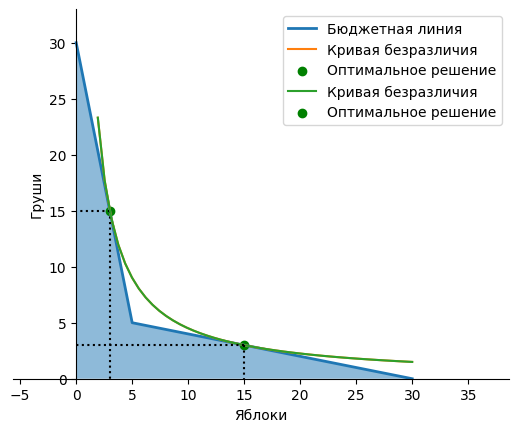

In [578]:
def budget_Cobb_Douglas_solution(g1: Good, g2: Good, budget, alpha=0.5):
    # ломаную превратим в треугольники, и рассмотрим их по отдельности
    x_solution_1 = alpha * (g2.quantity(budget) / (g1.price_1 / g2.price_2))
    y_solution_1 = (1 - alpha) * g2.quantity(budget)
    x_solution_11 = (g2.quantity(budget) / (g1.price_1 / g2.price_2))
    y_solution_11 = g2.quantity(budget)

    if g1.quantity(budget - g2.price_1 * g2.threshold) > g1.threshold:
        x_solution_2 = alpha * (
                g1.quantity(budget - g2.price_1 * g2.threshold) / (g1.price_1 / g2.price_1) + g1.threshold)
        y_solution_2 = (1 - alpha) * (
                g2.quantity(budget - g1.price_1 * g1.threshold) * (g1.price_1 / g2.price_1) + g2.threshold)
        x_solution_22 = g1.quantity(budget - g2.price_1 * g2.threshold) / (g1.price_1 / g2.price_1) + g1.threshold
        y_solution_22 = g2.quantity(budget - g1.price_1 * g1.threshold) * (g1.price_1 / g2.price_1) + g2.threshold
    else:

        x_solution_2 = alpha * g1.threshold / (g1.price_2 / g2.price_2)
        y_solution_2 = (1 - alpha) * g2.threshold * (g1.price_2 / g2.price_2)
        x_solution_22 = g1.threshold / (g1.price_2 / g2.price_2)
        y_solution_22 = g2.threshold * (g1.price_2 / g2.price_2)

    x_solution_3 = alpha * g1.quantity(budget)
    y_solution_3 = (1 - alpha) * (g1.quantity(budget) * (g1.price_2 / g2.price_1))
    x_solution_33 = g1.quantity(budget)
    y_solution_33 = (g1.quantity(budget) * (g1.price_2 / g2.price_1))

    # проверим, что ответ принадлежит исходной линии
    if g1.quantity(budget - g2.price_1 * g2.threshold) > g1.threshold:
        if x_solution_1 > g1.threshold:
            x_solution_1 = g1.threshold
            y_solution_1 = g2.quantity(budget - g1.price_1 * g1.threshold)
        if y_solution_3 > g2.threshold:
            y_solution_3 = g2.threshold
            x_solution_3 = g1.quantity(budget - g2.price_1 * g2.threshold)
        if x_solution_2 < g1.threshold:
            x_solution_2 = g1.threshold
            y_solution_2 = g2.quantity(budget - g1.price_1 * g1.threshold)
        if x_solution_2 > g1.quantity(budget - g2.price_1 * g2.threshold):
            x_solution_2 = g1.quantity(budget - g2.price_1 * g2.threshold)
            y_solution_2 = g2.threshold
    else:
        if x_solution_1 > g1.quantity(budget - g2.price_1 * g2.threshold):
            x_solution_1 = g1.quantity(budget - g2.price_1 * g2.threshold)
            y_solution_1 = g2.threshold
        if x_solution_3 < g1.threshold:
            x_solution_3 = g1.threshold
            y_solution_2 = g2.quantity(budget - g1.price_1 * g1.threshold)
        if x_solution_2 < g1.quantity(budget - g2.price_1 * g2.threshold):
            x_solution_2 = g1.quantity(budget - g2.price_1 * g2.threshold)
            y_solution_2 = g2.threshold
        if x_solution_2 > g1.threshold:
            x_solution_2 = g1.threshold
            y_solution_2 = g2.quantity(budget - g1.price_1 * g1.threshold)

    ## для отладки
    # fig, ax = plt.subplots()
    #
    # if g1.quantity(budget - g2.price_1 * g2.threshold) > g1.threshold:
    #     x_points = [0, g1.threshold, g1.quantity(budget - g2.price_1 * g2.threshold), g1.quantity(budget)]
    #     y_points = [g2.quantity(budget), g2.quantity(budget - g1.price_1 * g1.threshold), g2.threshold, 0]
    # else:
    #     x_points = [0, g1.quantity(budget - g2.price_1 * g2.threshold), g1.threshold, g1.quantity(budget)]
    #     y_points = [g2.quantity(budget), g2.threshold, g2.quantity(budget - g1.price_1 * g1.threshold), 0]
    # ax.plot(x_points, y_points, label="Бюджетная линия")  # Строим БЛ
    #
    # ax.plot([x_solution_11, 0], [0, y_solution_11])
    # ax.scatter(x_solution_1, y_solution_1)
    # ax.plot([x_solution_22, 0], [0, y_solution_22])
    # ax.scatter(x_solution_2, y_solution_2)
    # ax.plot([x_solution_33, 0], [0, y_solution_33])
    # ax.scatter(x_solution_3, y_solution_3)
    # plt.show()

    return [math.pow(x_solution_1, alpha) * math.pow(y_solution_1, 1 - alpha),
            math.pow(x_solution_2, alpha) * math.pow(y_solution_2, 1 - alpha),
            math.pow(x_solution_3, alpha) * math.pow(y_solution_3, 1 - alpha)], [x_solution_1, x_solution_2,
                                                                                 x_solution_3], [y_solution_1,
                                                                                                 y_solution_2,
                                                                                                 y_solution_3]


def Cobb_Douglas(x, c=1.0, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha / (1 - alpha)) * math.pow(c, 1 / (1 - alpha))


def plot_budget_Cobb_Douglas(g1: Good, g2: Good, budget, alpha=0.5):
    C, X, Y = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    # строим бюджетное множество
    if g1.quantity(budget - g2.price_1 * g2.threshold) > g1.threshold:
        x_points = [0, g1.threshold, g1.quantity(budget - g2.price_1 * g2.threshold), g1.quantity(budget)]
        y_points = [g2.quantity(budget), g2.quantity(budget - g1.price_1 * g1.threshold), g2.threshold, 0]
    else:
        x_points = [0, g1.quantity(budget - g2.price_1 * g2.threshold), g1.threshold, g1.quantity(budget)]
        y_points = [g2.quantity(budget), g2.threshold, g2.quantity(budget - g1.price_1 * g1.threshold), 0]

    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия", linewidth=2)
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    # строим оптимальные решенияя
    max_c = max(C)
    opt_points = [i for i in range(3) if C[i] == max_c]
    x_values = np.linspace(0.1, g1.quantity(budget))
    for i in opt_points:
        y_values = np.array([Cobb_Douglas(x, C[i], alpha) for x in x_values])
        filter = y_values < g2.quantity(budget)
        ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
        ax.scatter(X[i], Y[i], label="Оптимальное решение", color='green')
        ax.plot([X[i], 0], [Y[i], Y[i]], 'k:')
        ax.plot([X[i], X[i]], [Y[i], 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    # ограничим график, чтобы не отображать ненужную информацию о КБ
    ax.set_xlim([0, g1.quantity(budget) * 1.1])
    ax.set_ylim([0, g2.quantity(budget) * 1.1])
    ax.legend(loc='upper right')
    plt.show()

# пример с 2 точками, где достигается одинаковаяя полезность
g1 = Good("Яблоки", 5, 5, 1)
g2 = Good("Груши", 5, 5, 1)
plot_budget_Cobb_Douglas(g1, g2, 50, 0.5)

In [582]:
def interactive_plot(th1, th2, p1_1, p1_2, p2_1, p2_2, budget, alpha):
    g1 = Good("Благо 1", th1, p1_1, p1_2)
    g2 = Good("Благо 2", th2, p2_1, p2_2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);


interact(interactive_plot, th1=widgets.IntSlider(start=1, end=20, step=1, value=3),
         th2=widgets.IntSlider(start=1, end=20, step=1, value=7),
         p1_1=widgets.IntSlider(start=1, end=20, step=1, value=8),
         p1_2=widgets.IntSlider(start=1, end=20, step=1, value=2),
         p2_1=widgets.IntSlider(start=1, end=20, step=1, value=7),
         p2_2=widgets.IntSlider(start=1, end=20, step=1, value=3),
         budget=widgets.IntSlider(start=1, end=100, step=1, value=77),
         alpha=(0.1, 0.9));


interactive(children=(IntSlider(value=3, description='th1'), IntSlider(value=7, description='th2'), IntSlider(…